Previously, we covered: 
- Computational programming with Python+NumPy, 
- Visualization with matplotlib, and 
- Machine learning with SciKit 
    - Feature Engineering, Model Validation, Supervised Learning



# Digging Deeper: Linear Regression

https://flic.kr/p/4uedXX

Objectives
- Cost functions
- Hypothesis functions
- Implement our LR algoirthm

### Data Input
Generally a **structured** array of real-numbers:
- $ x \in {\rm I\!R}^m$

### Data Output 
Vector or real numbers:
- $ y \in {\rm I\!R}^1$

$x$ and $y$ should both have the same length: $n$. <br>
$x$ might have multiple columns representing multiple features: $m$.

For instance, for the iris dataset, we had 4 features and 150 data points: $m=4$ and $n=150$

### Objective
We are trying to find $y = h(x)$ where $y_i \approx h(x_i)$ where $i$ is a training example. 

$h(x)$ is called the **hypothesis function**. 

Different ML algos have different **$h$ models**. 

## Overview

hypothessis, cost, linReg: 1d, nD

### Regression output
$h(x) = \sum_{i=0}^n w_i x_i + b$

This yields a **line** that best fits our data. 



Let's start with the built-in models and then build our own. 

Dataset: Boston housing prices. 

In [22]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_boston
#Boston housing prices
boston = load_boston()

In [24]:
#info
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [29]:
#Format: Dictionary 
print(boston.keys())
#Size it up
print(boston.data.shape)
#What are the 13 features?
print(boston.feature_names)

boston.target.shape


dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [30]:
X = boston.data
y = boston.target
print(X.shape, y.shape)

Xh = X
yh = y

(506, 13) (506,)


In [31]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=42)

print(Xtrain.shape, ytrain.shape)

(379, 13) (379,)


## Exercise 1

### SciKit Implementation

Use the sklearn LinearRegression() to:
- fit a model on train data
- test on model
- measure performance (MSE)
- plot true vs predicted prices

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



## Solution

In [ ]:
#To see the solution, load or open the following file:
# %load ML_lr_1.py

# %%writefile ML_lr_1.py


MSE:  26.2677404865


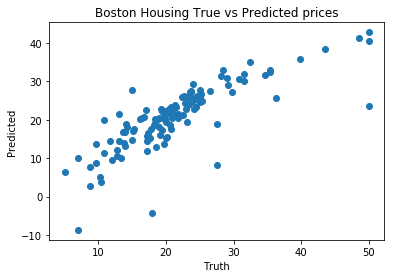

In [35]:
# %%writefile ML_lr_1.py

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=False)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

#Note: if error: you may need np.asarray(...,dtype=np.float64)

#3. Test it on test data
#for classificaiton
# from sklearn.metrics import accuracy_score
# accuracy_score(ytest, y_model)
#for regression
mse = mean_squared_error(ytest, y_model)
print("MSE: ", mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [48]:
# Model:
print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)

#y = wx + b
#slope: a, intercept: b 
print(boston.feature_names)


Model intercept: 0.0
Model slope:     [-0.11577021  0.03417885  0.04365068  2.73433869 -4.14661402  6.07025074
 -0.0138361  -0.96917437  0.1368985  -0.00731621 -0.46536205  0.01781281
 -0.44042933]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## But how to find $w$ and $b$? 

We need the find the set of params that will **minimize the error between the line and the output**. 

### First, we quantify the error

We need to quantify the difference between our **linear estimate, $h(x)$, and the labels, $f(x)$**.

For this algorithm, we will use squared error:

Calculate the **squared difference between the expected output f(x) and the estimate h(x)**:

$E_l = (f(x) - h(x))^2$

or for single dimensional case, per-element:

$E_l = \sum_{i=0}^n (y_i - (wx_i + b))^2$
<br>  
$E_l = \sum_{i=0}^n (y_i - wx_i - b)^2$

### How can we minimize the error?
What is our favorite operation from Calculus that will allow us to find a minima? 

We set __________ of $E_l$ to 0. 

## Cost function

Most of the learning algorithms are differ by their **cost or hypothesis function design**. 

If we look at their cost funcitons, we can understand what they are trying to achieve and how. 

They may also be called objective functions or loss functions. 

Cost functions are generally represented via **$J(.)$**. 

$J$ represents the cost function and $.$ represents the parameter that we will we **search over among the hypotheses to minimize the error**. 

For our case, $E_l$ is our cost function and it represents the amount of error generated by our current prediction of y. 

### Minimizing our cost function

1D case (single feature): 

Since we have a cost function and we know how to min a function:

$E_l = \sum_{i=0}^n (y_i - wx_i - b)^2$

How can we differentiate $E_l(w,b)$?

We need the **chain rule**. 

Examples from Khan academy:
https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review

Note: Multivarate representation of this rule from Calc 2 is more appripriate for this class. But, I am keeping it CS Freshman friendly.

$\frac{d}{dx} (f(g(x)) = f'\big(g(x)\big) g'(x) $

Ex1: $(5-6x)^5$

Ex2: $\sin(2x^3-4x)$

### Exercise
Compute the partial derivative of $J$ wrt to $w$:

$\frac{d}{dw} (y - wx)^2 $

### Solution

fill...

Since we have two sets of params to optimize, we need to set the partial derivative of $J$ to $0$ for both variables:

$J(w,b) = \sum_{i=0}^n (y_i - wx_i - b)^2$

$\begin{align}
\frac{dJ}{dw} &= \sum_{i=0}^n -2x_i(y_i-wx_i-b) \\
\frac{dJ}{db} &= \sum_{i=0}^n -2(y_i-wx_i-b) \\
\end{align}$

We then set each equation to 0 to find their min:

$\begin{align}
\frac{dJ}{dw} &= \sum_{i=0}^n -2x_i(y_i-wx_i-b) \\
&= -\sum_{i=0}^n x_iy_i  + w\sum_{i=0}^n x^2_i + b\sum_{i=0}^n x_i\\
 &= 0 \\
\end{align}$

$\begin{align}
\frac{dJ}{db} &= \sum_{i=0}^n -2(y_i-w x_i-b) \\
&= -\sum_{i=0}^n y_i  + w\sum_{i=0}^n x_i + b n\\
 &= 0 \\
\end{align}$

This is a set of linear equations. We can solve them for $w, b$ to minimize the MSE

### Solution to single feature linear regression

We have **2 unkowns** and **2 equations**. 

Closed form solution for the above equations are:

$
w = \frac{\sum_{i=0}^n (x_i - x_m) (y_i - y_m)}{\sum_{i=0}^n (x_i - x_m)^2} $

$b = y_m - wx_m$

where $x_m$ and $y_m$ are the means of the $x$ and $y$ vectors, respectively. 

## Exercise 

Can you rewrite the equation for $w$ using statistical terms?
 

## Exercise 2

Implement the single-feature linear regresion to fit the best fit for $xl, yl$ as defined below. 

Do not estimate your error, but plot the resulting line.

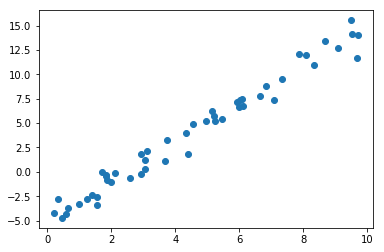

In [41]:
#Example 1D dataset
rng = np.random.RandomState(42) #seed
xl = 10 * rng.rand(50) # x with noise
yl = 2 * xl - 5 + rng.randn(50) # y is a linear func of x + noise
plt.scatter(xl, yl);

In [42]:
#Solve for w and b using the derivation above 
# and plot the result of a linear fit

## Solution

In [ ]:
#To see the solution, load or open the following file:
# %load ML_lr_2.py

# %%writefile ML_lr_2.py


Slope:  1.97765660039 -4.90331072553


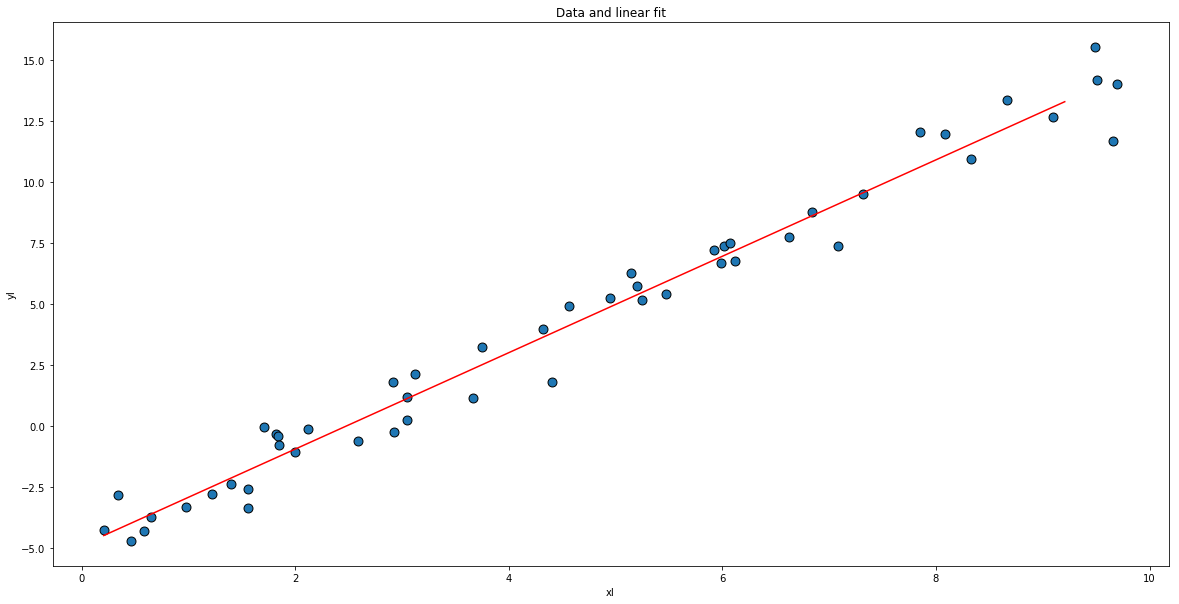

In [43]:
# %%writefile ML_lr_2.py

X = xl
y = yl

xm = np.mean(X)
ym = np.mean(y)

w = np.sum((X - xm)*(y-ym))/np.sum((X-xm)**2)
b = ym - w*xm

print("Slope: ",w,b)

from matplotlib.colors import ListedColormap

plt.figure(figsize=(20,10))
# Plot also the training points
plt.scatter(X, y, edgecolor='k', s=80)

Xt = np.arange(np.min(X), np.max(X), 1)
yt = (w * Xt) + b
plt.plot(Xt, yt, c='r')

plt.xlabel("xl")
plt.ylabel("yl")
plt.title("Data and linear fit")

### General solution for linear regression

If $x$ has multiple features, we can generalize our solution and take advantage of the matrix representation:

$J = \frac{1}{n}\left\Vert Xw - y  \right\Vert^2 $

where $X$ is n by m and $y$ is n by 1.

We take the partial derivative of $J$ wrt to $w$:

$J = \frac{1}{n}\left\Vert Xw - y  \right\Vert^2 $

$\nabla J(w) = \frac{2}{n}X^T(Xw - y)$

We then set it to 0 

$\nabla J(w) = \frac{2}{n}X^T(Xw - y) = 0 $ 

and drop the constants:

$X^T Xw = X^Ty$

Remember your linear algebra and solve for w:

$w = X^py$

where $X^p$ is the pseudo-inverse and given that each column of features is linearly independent. 

## Exercise 3

### Linear Regression

Implement the linear regression as solved for above to find the coefficients to the housing problem. 

Predict on test data. 

Does your error match the scikit model?

In [44]:
#Calculate w for the Boston housing prices using the general solution for linear regression provided above
#Predict on test data and plot the true vs predicted prices  

# Hint: np.linalg.pinv

## Solution

In [ ]:
#To see the solution, load or open the following file:
# %load ML_lr_3.py

# %%writefile ML_lr_3.py



Our slope:  [-0.11577021  0.03417885  0.04365068  2.73433869 -4.14661402  6.07025074
 -0.0138361  -0.96917437  0.1368985  -0.00731621 -0.46536205  0.01781281
 -0.44042933]
Scikit model slope:     [-0.11577021  0.03417885  0.04365068  2.73433869 -4.14661402  6.07025074
 -0.0138361  -0.96917437  0.1368985  -0.00731621 -0.46536205  0.01781281
 -0.44042933]
(127,) (127, 13) (13,)
*** MSE:  26.2677404865


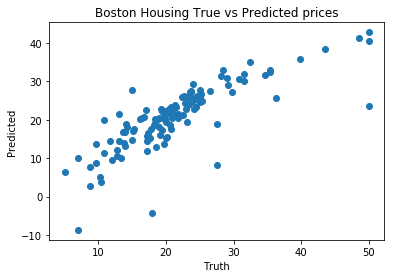

In [49]:
# %%writefile ML_lr_3.py

X= Xtrain
y = ytrain
#train
w = np.dot(np.linalg.pinv(X),y)
print("Our slope: ", w)
print("Scikit model slope:    ", model.coef_)

#predict
y_model = Xtest @ w
# y_model = np.dot(Xtest, w)

print(y_model.shape, Xtest.shape, w.shape)
mse = mean_squared_error(ytest, y_model)
print("*** MSE: ", mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

## Bias

## ME: mention as future work? lab assignment?

We set fit_intercept to false for the multi-feature implementation. 

How can we include it in our implementation? 

### Hint

Our hypothesis function is

$E_l = \sum_{i=1}^n (y_i - (wx_i + b))^2$

Let $b$ be another weight: $w_0$

$\begin{align}
h(x) &= \sum_{i=1}^n wx_i + w_0 \\
&= w_0 + w_1x_1 + w_2x_2 + \ldots + w_mx_m
\end{align}$


## Can we classify? 

Yes!

## Summary 

We have discussed:

- cost function design
- hypothesis function for linear regression
- using partial derivatives to min the cost function
- linear regression implementation

### Next time
Most ML/AI algorithms rely on computing the cost function, $J(u)$ and its gradient, $\nabla_uJ(u)$ for any possible $u$.

Since the gradiet points us in the direction of the steepest increase, this makes sense. 

Next, we will discuss how we can use **gradient descent algorithm to minimize differentiable cost funtions**. 